In [1]:
import tensorflow as tf          #build ML models
import numpy as np               #numerical analysis
import pandas as pd              #data frame manipulation
import matplotlib.pyplot as plt  #data visualization
import seaborn as sns            #data visualization
import random                    #generate random numbers
import pickle                    #data serialization and deserialization

In [2]:
with open("./traffic-signs-data/train.p",mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p",mode = "rb") as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p",mode = "rb") as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'],valid['labels']
X_test, y_test = test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

## Performing Image Visualization here
#### A sanity check to find if the data and labels make sense

25


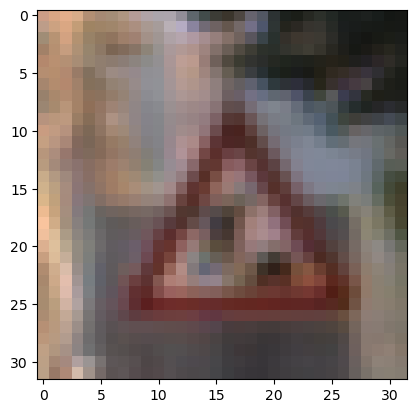

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
print(y_train[i])
plt.show()

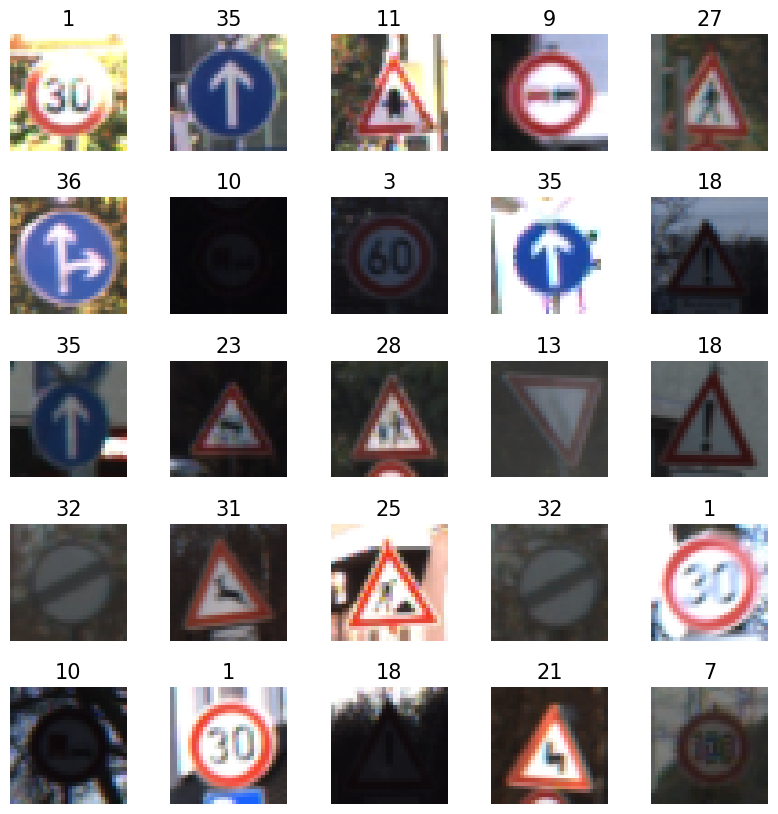

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    
    # Select a random number
    index = np.random.randint(0,n_training)

    # read and display an image with the selected index  
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)
plt.show()

## Convert images to grayscale and perform normalization

In [8]:
#shuffe the data so that the network doesn't learn the sequence/order of the images
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [9]:
# Converting the RGB image to grayscale
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
# Normalize the images
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

13


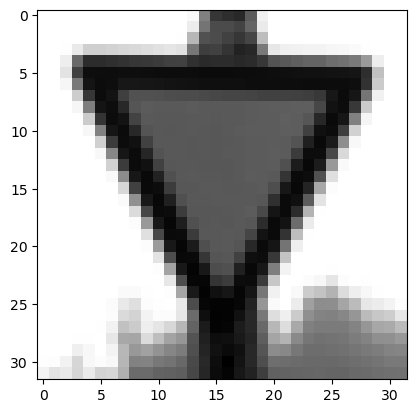

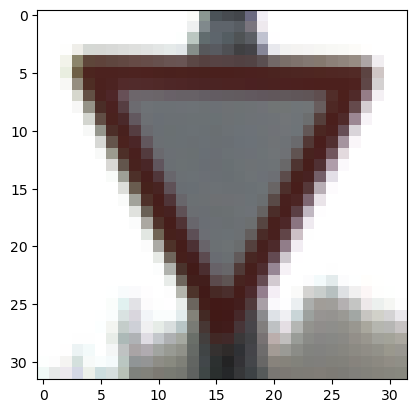

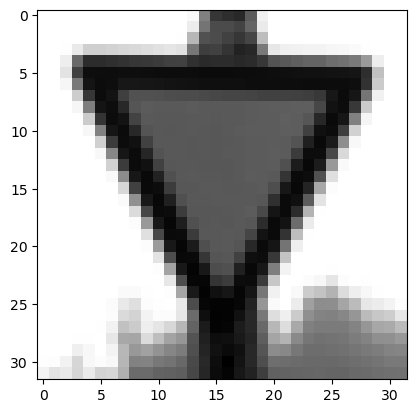

In [11]:
# displaying the grayscale, original, normalized images
i = random.randint(0,len(X_train_gray))
print(y_train[i])
plt.imshow(X_train_gray[i],cmap = 'gray')
plt.show()
plt.imshow(X_train[i])
plt.show()
plt.imshow(X_train_gray_norm[i],cmap='gray')
plt.show()

## Building the deep convolution neural network

In [12]:
from tensorflow.keras import datasets, layers, models
Cnn = models.Sequential()

Cnn.add(layers.Conv2D(6,(5,5), activation = 'relu', input_shape = (32,32,1)))
Cnn.add(layers.AveragePooling2D())

Cnn.add(layers.Dropout(0.2))

Cnn.add(layers.Conv2D(16,(5,5), activation = 'relu', input_shape = (32,32,1)))
Cnn.add(layers.AveragePooling2D())



Cnn.add(layers.Flatten())

Cnn.add(layers.Dense(120,activation = 'relu'))
Cnn.add(layers.Dense(84,activation = 'relu'))
Cnn.add(layers.Dense(43,activation = 'softmax'))
Cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

## Compile and train deep CNN model

In [13]:
Cnn.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
#fit the training data into the model
datafit = Cnn.fit(X_train_gray_norm,
                y_train,
                batch_size = 500,
                epochs = 50,
                verbose = 1,
                validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 13s 184ms/step - loss: 0.1419 - accuracy: 0.9602 - val_loss: 0.4736 - val_accuracy: 0.8921
Epoch 2/50
70/70 [==============================] - 13s 185ms/step - loss: 0.1325 - accuracy: 0.9632 - val_loss: 0.4608 - val_accuracy: 0.8891
Epoch 3/50
70/70 [==============================] - 13s 185ms/step - loss: 0.1303 - accuracy: 0.9628 - val_loss: 0.4541 - val_accuracy: 0.8925
Epoch 4/50
70/70 [==============================] - 12s 172ms/step - loss: 0.1198 - accuracy: 0.9659 - val_loss: 0.5032 - val_accuracy: 0.8898
Epoch 5/50
70/70 [==============================] - 13s 179ms/step - loss: 0.1127 - accuracy: 0.9684 - val_loss: 0.4730 - val_accuracy: 0.8932
Epoch 6/50
70/70 [==============================] - 13s 183ms/step - loss: 0.1093 - accuracy: 0.9693 - val_loss: 0.5016 - val_accuracy: 0.8975
Epoch 7/50
70/70 [==============================] - 12s 176ms/step - loss: 0.1043 - accuracy: 0.9707 - val_loss: 0.5104 - val_accuracy: 0.8955

In [36]:
pred_score = Cnn.evaluate(X_test_gray_norm, y_test)
print("Test accuracy: {}".format(pred_score[1]))

395/395 [==============================] - 2s 5ms/step - loss: 0.6822 - accuracy: 0.9069
Test accuracy: 0.9068883657455444


In [21]:
datafit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
accuracy = datafit.history['accuracy']
val_accuracy = datafit.history['val_accuracy']
loss = datafit.history['loss']
val_loss = datafit.history['val_loss']

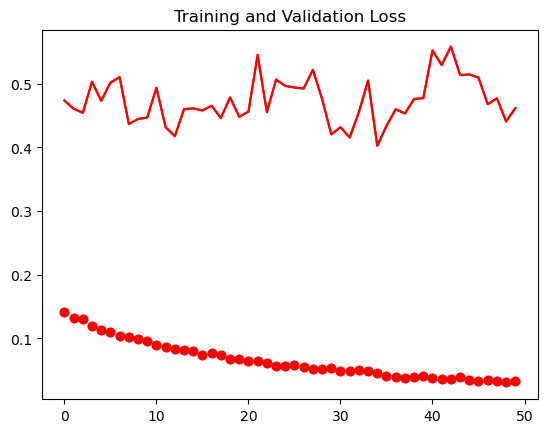

In [28]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="Validation Loss")
plt.title("Training and Validation Loss")
plt.show()

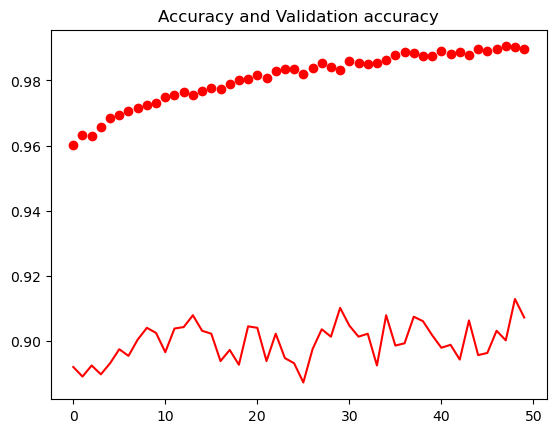

In [29]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label="Training accuracy")
plt.plot(epochs,val_accuracy,'r',label="Validation accuracy")
plt.title("Accuracy and Validation accuracy")
plt.show()

### Visualize and plot the confusion matrix

/home/chinmayee/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


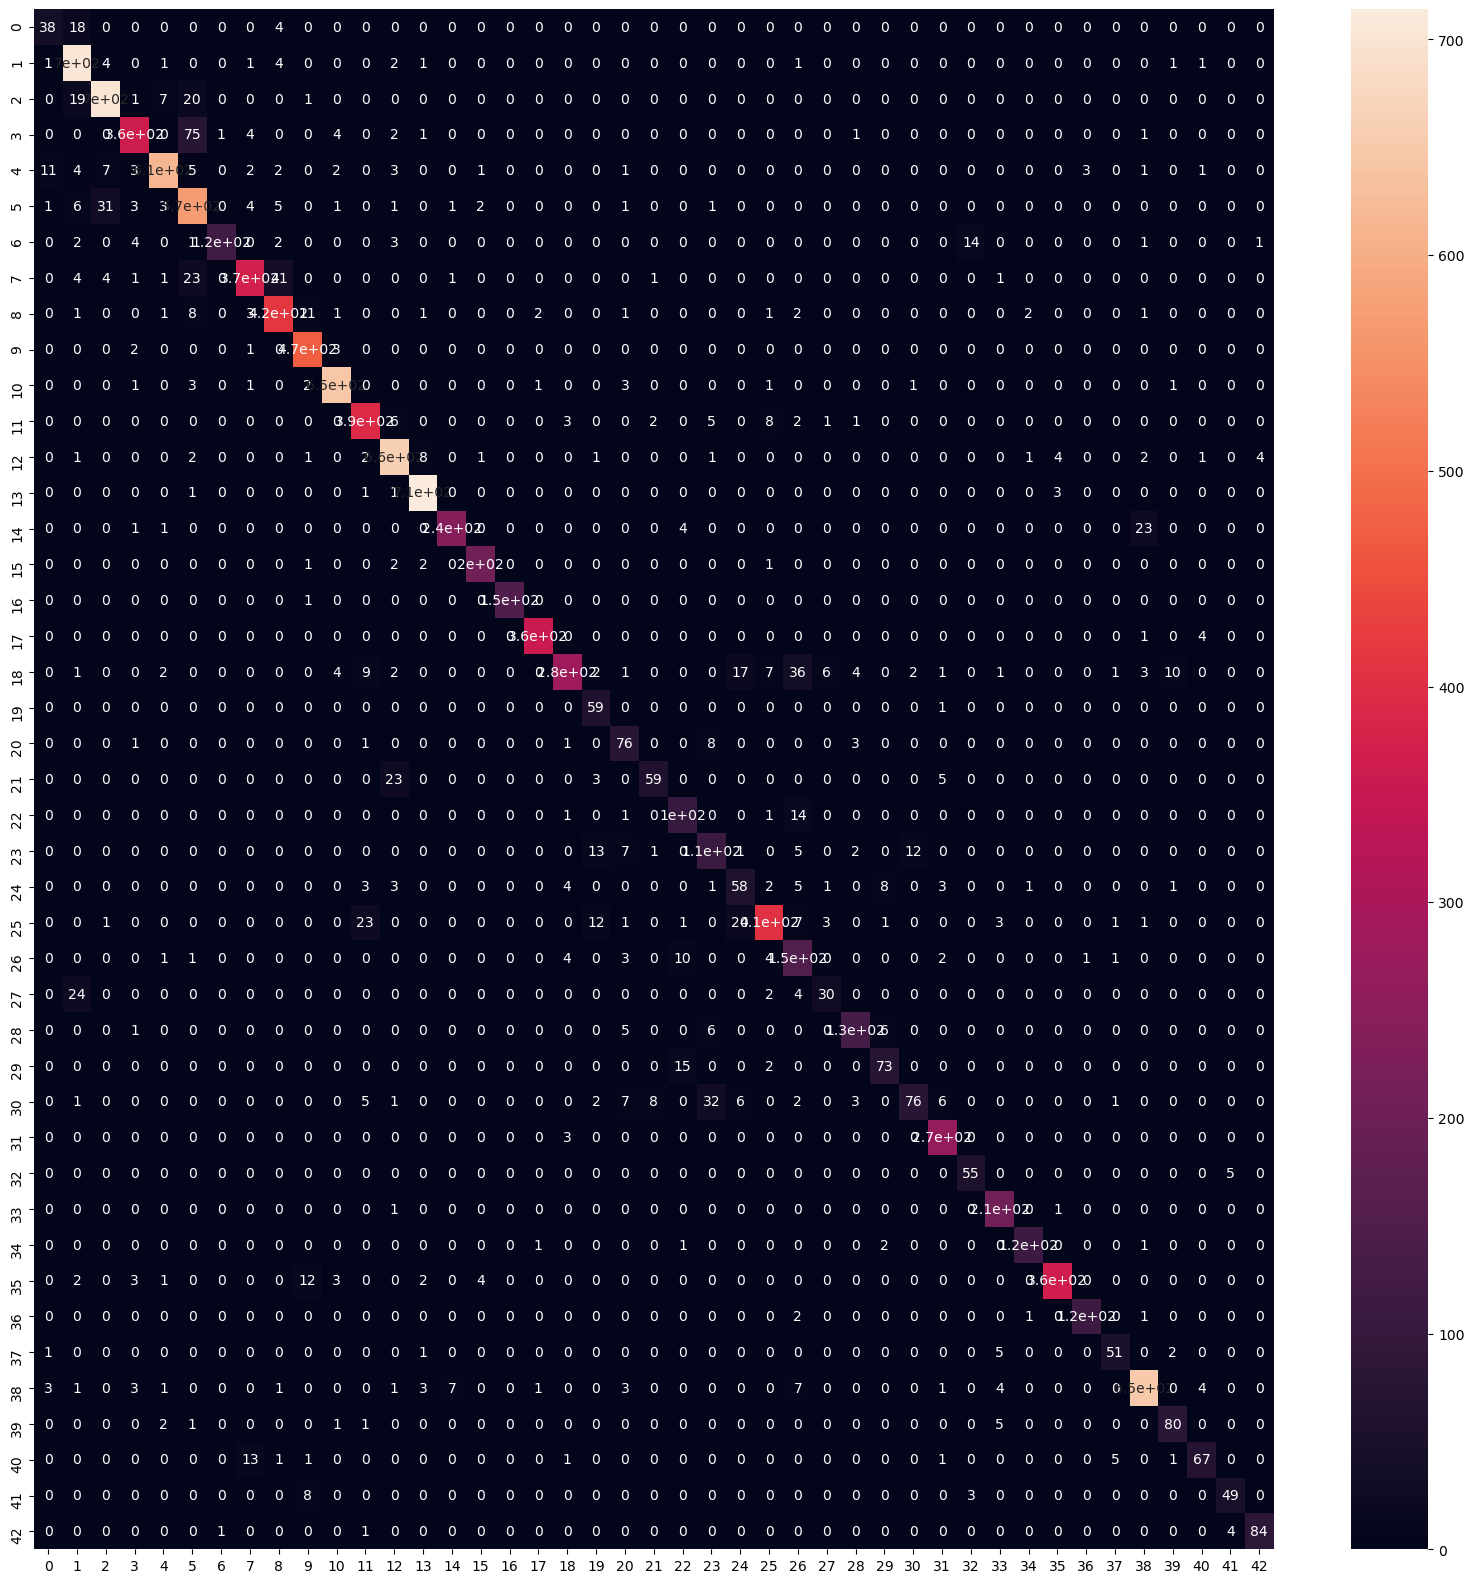

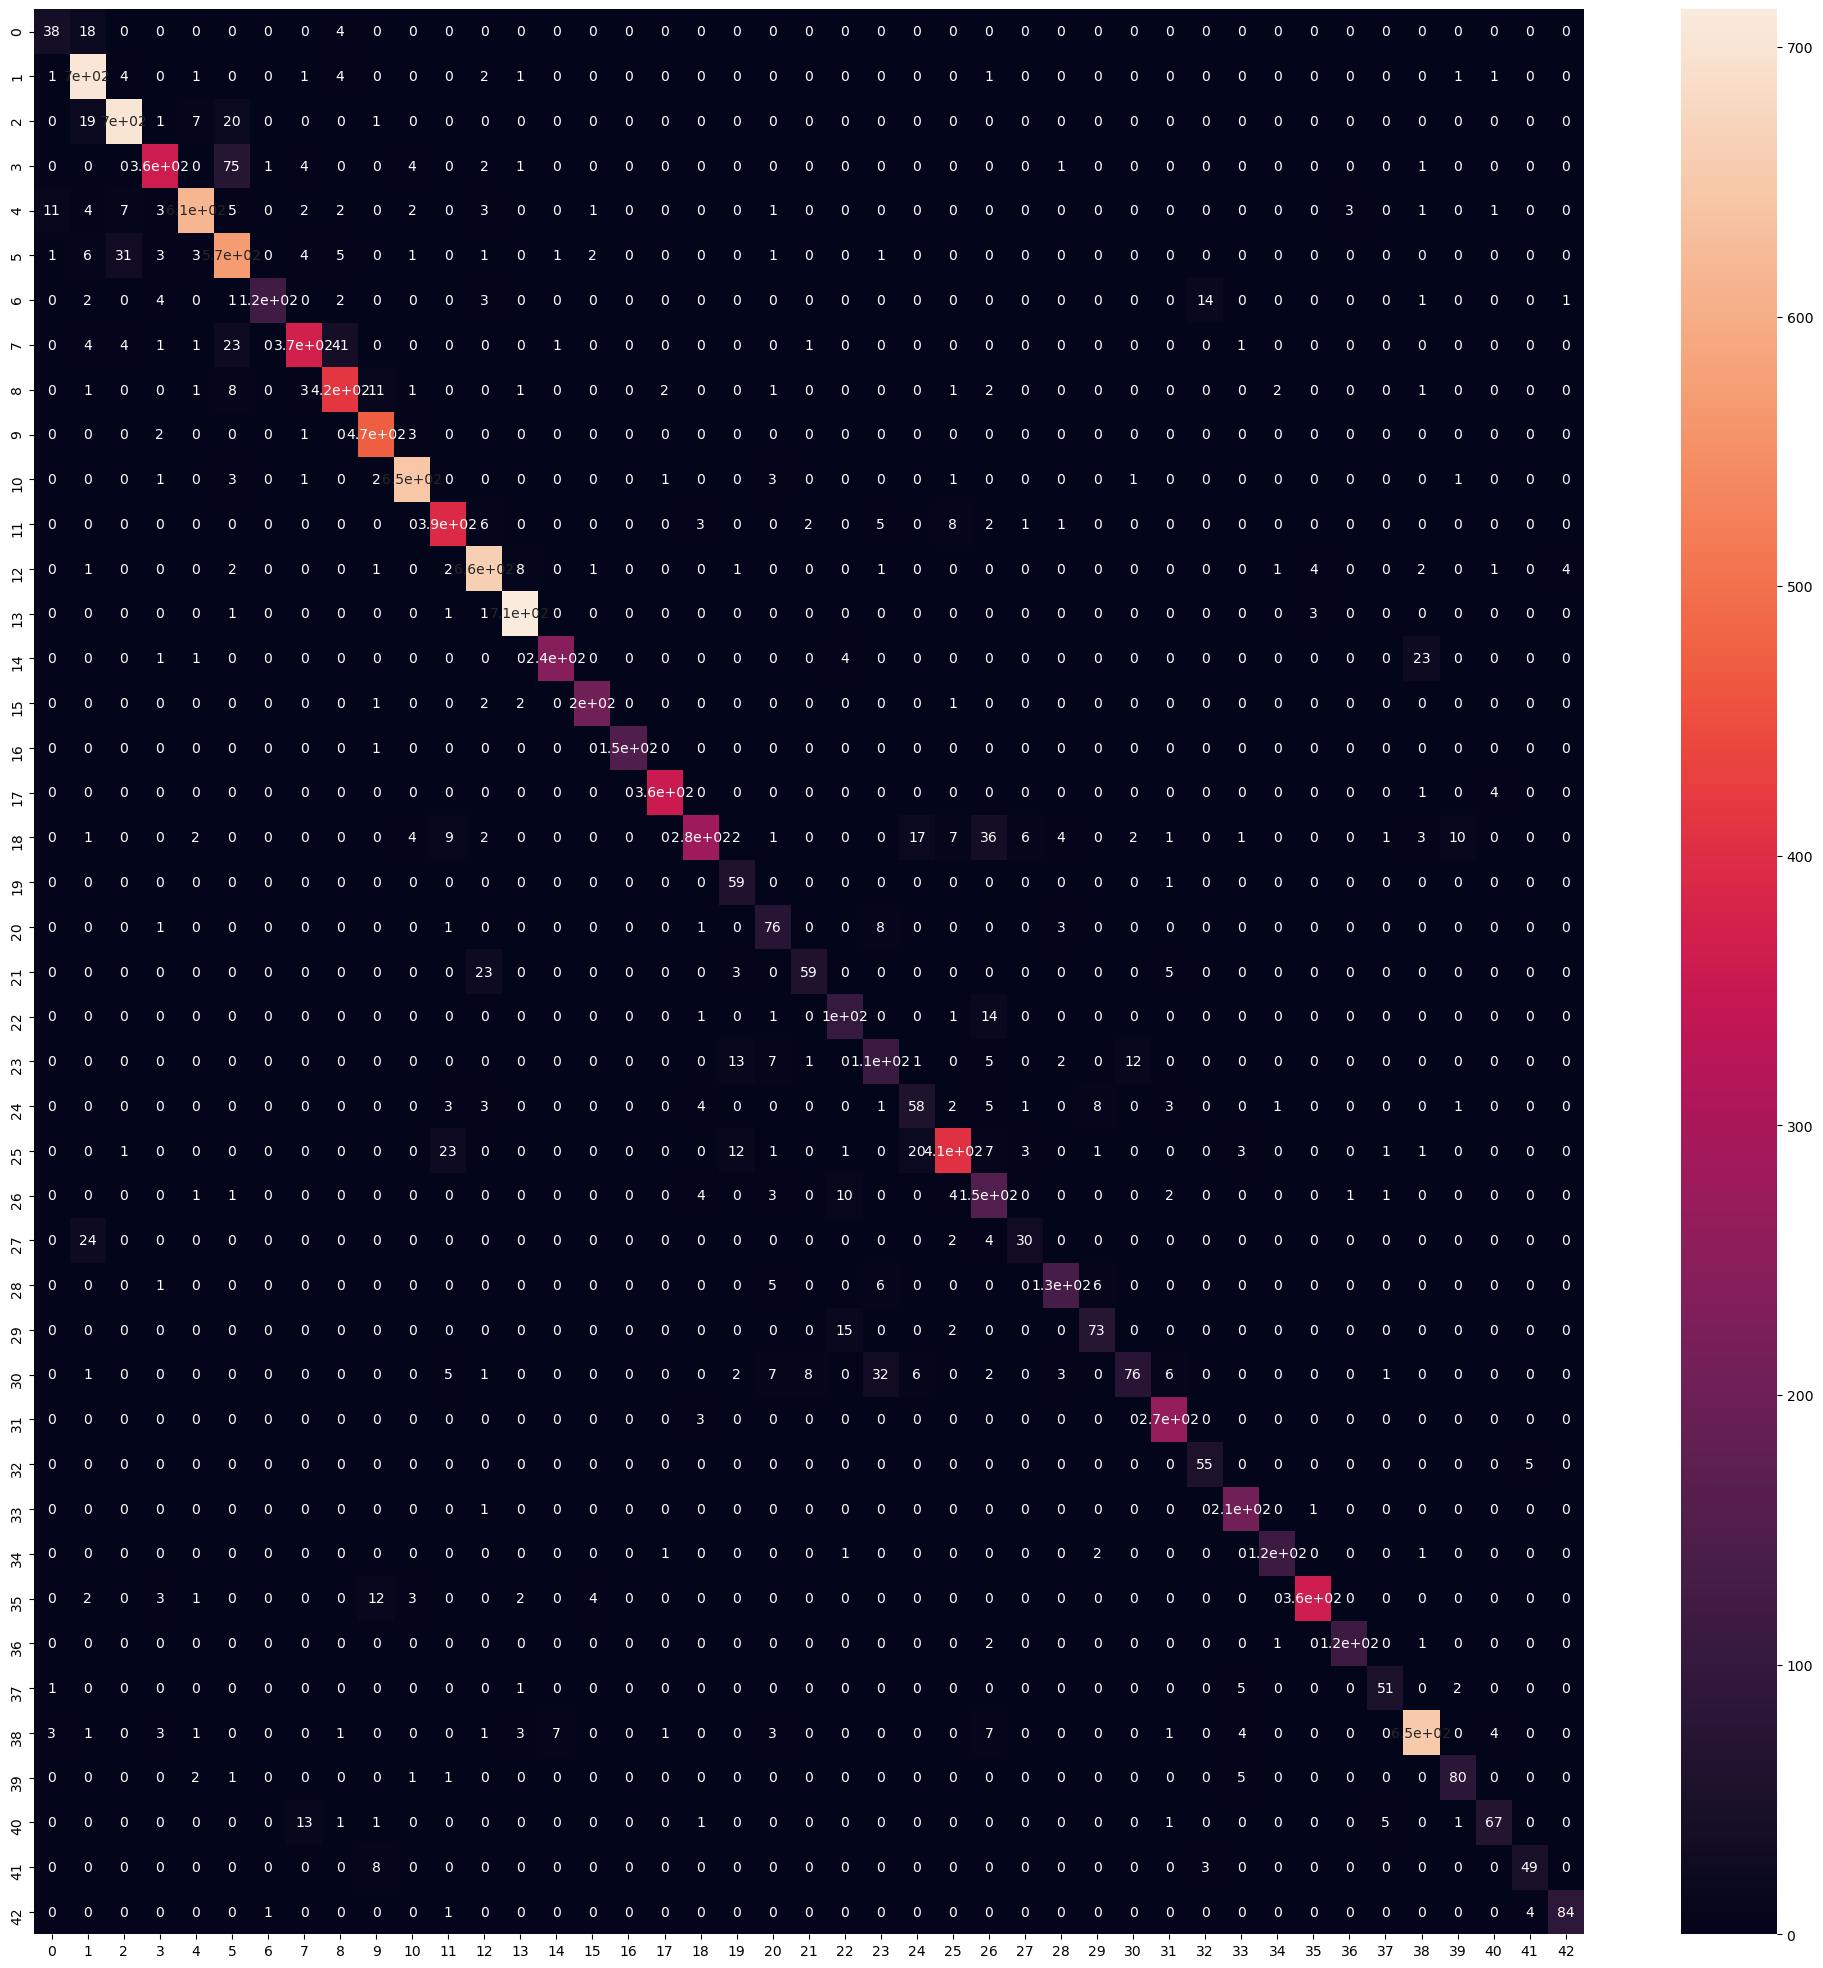

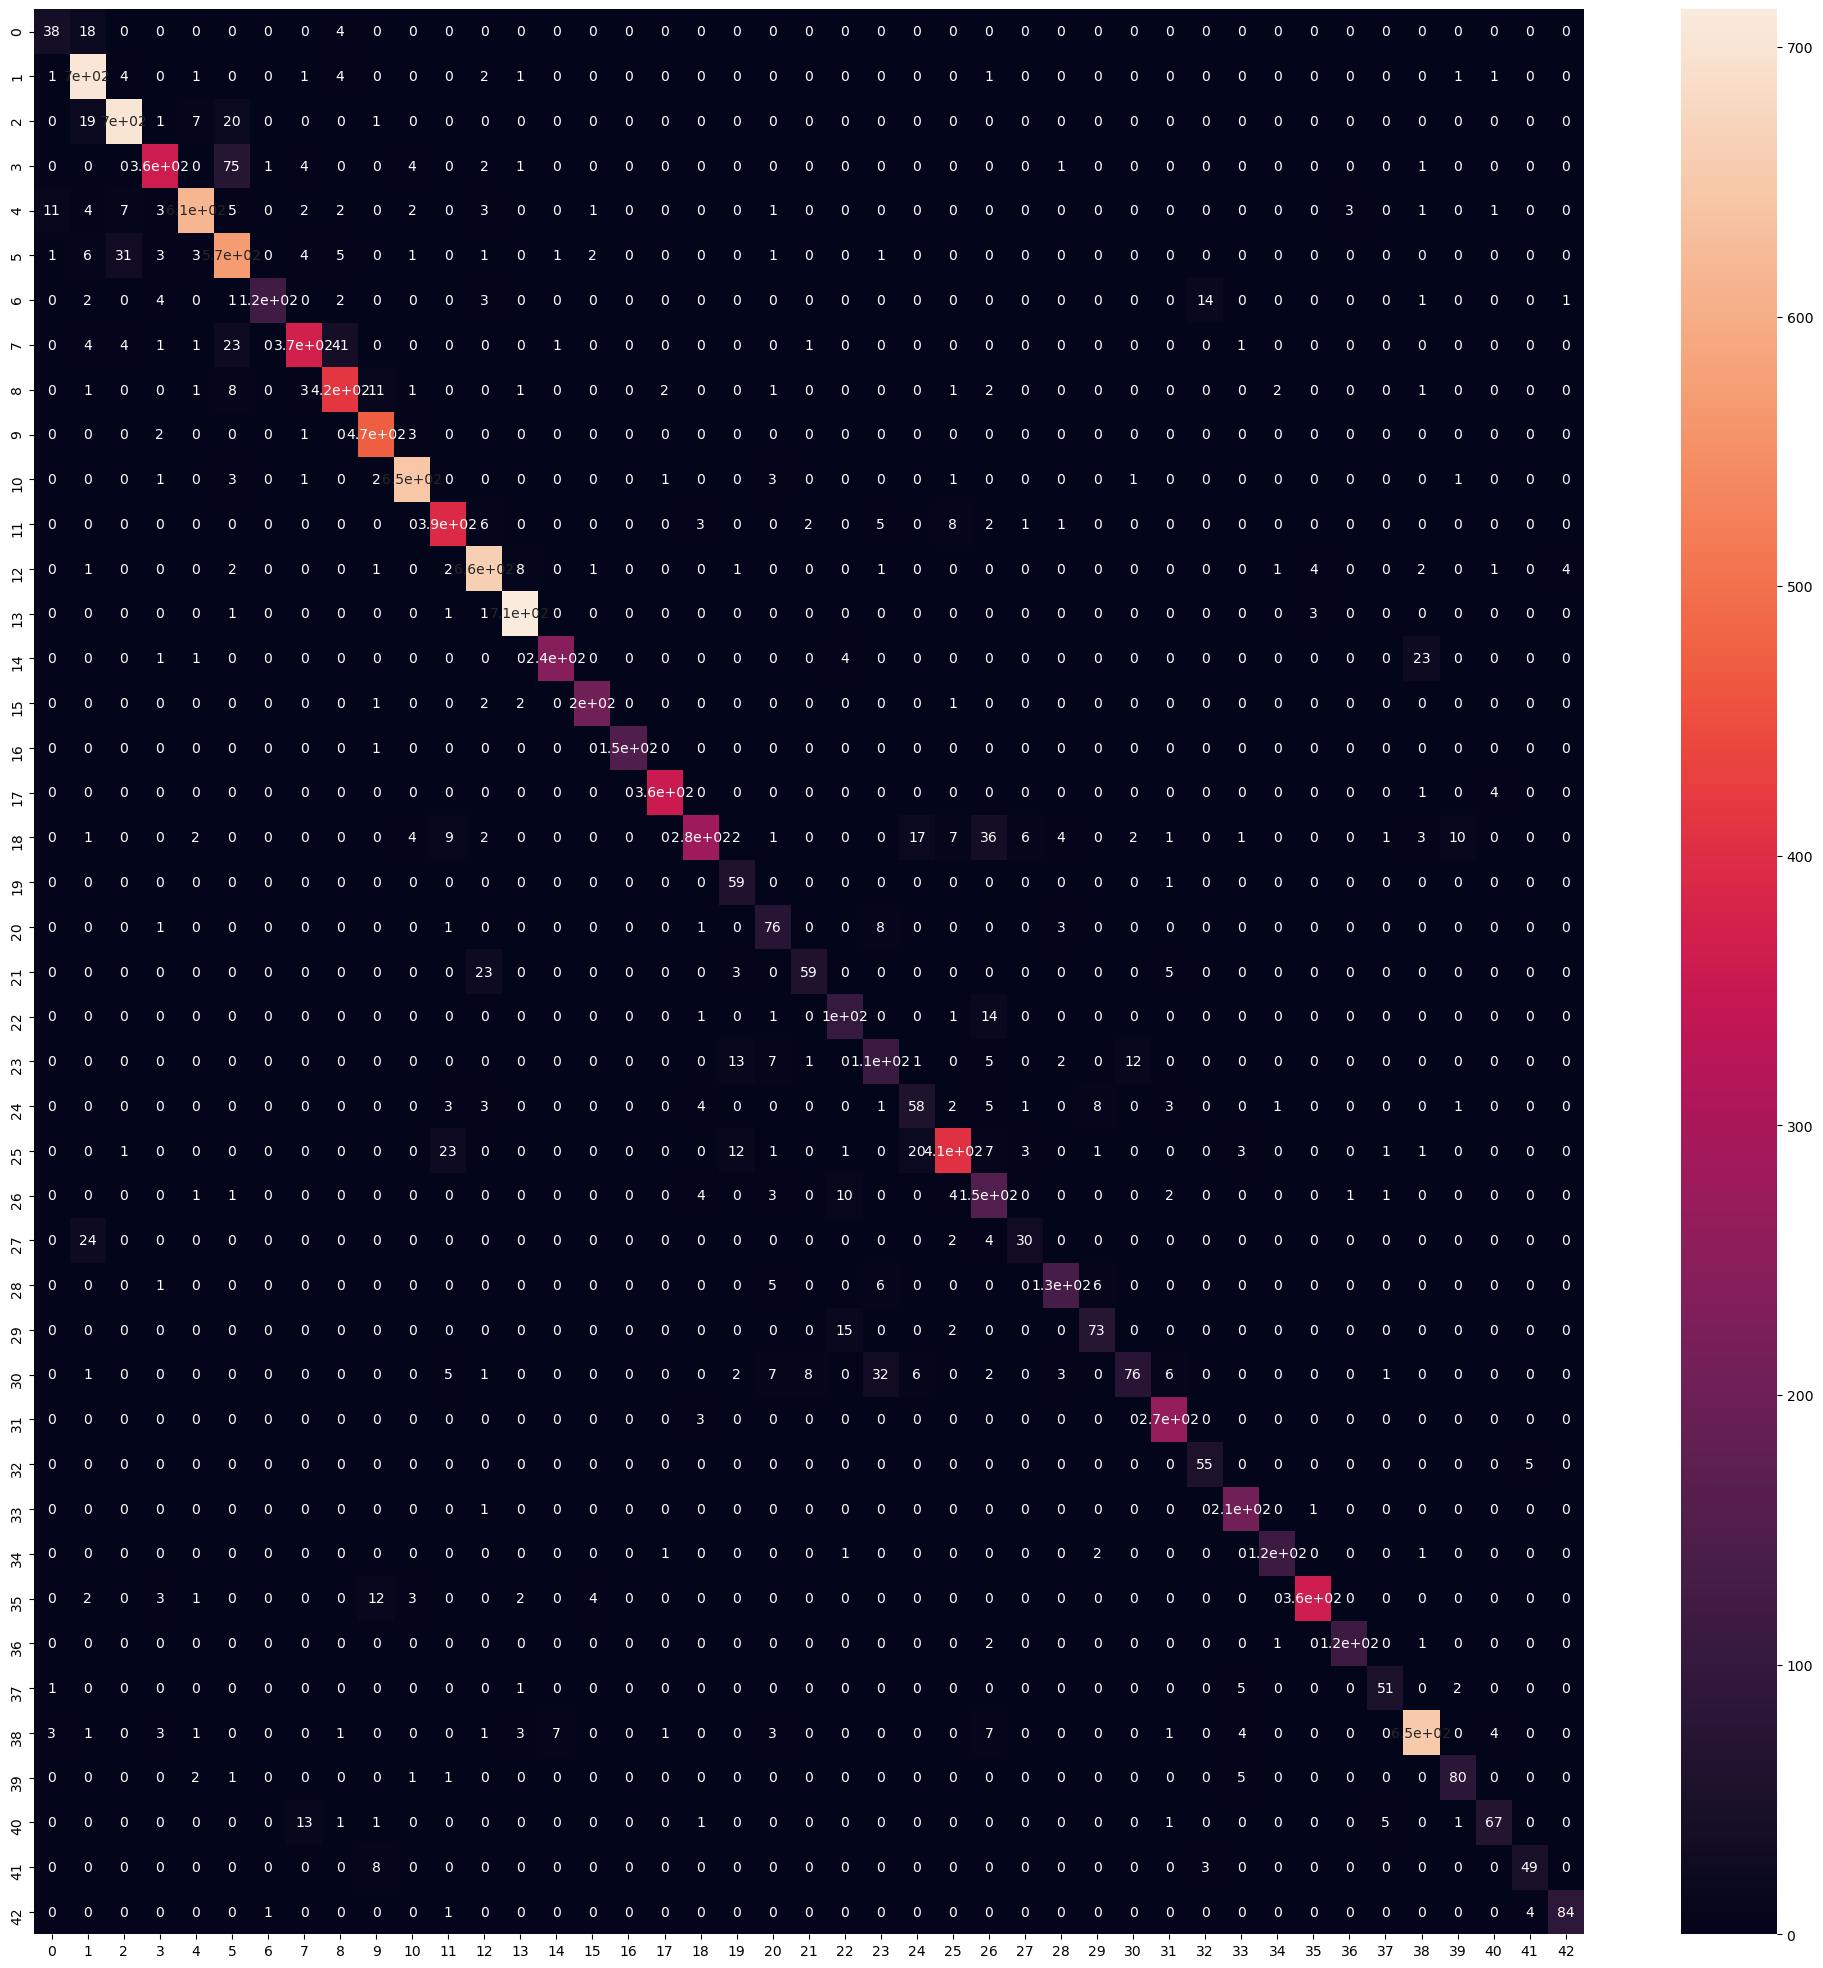

In [32]:
predicted_classes = Cnn.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)
plt.show()

### Plotting Predictions vs True Labels

<Figure size 640x480 with 0 Axes>

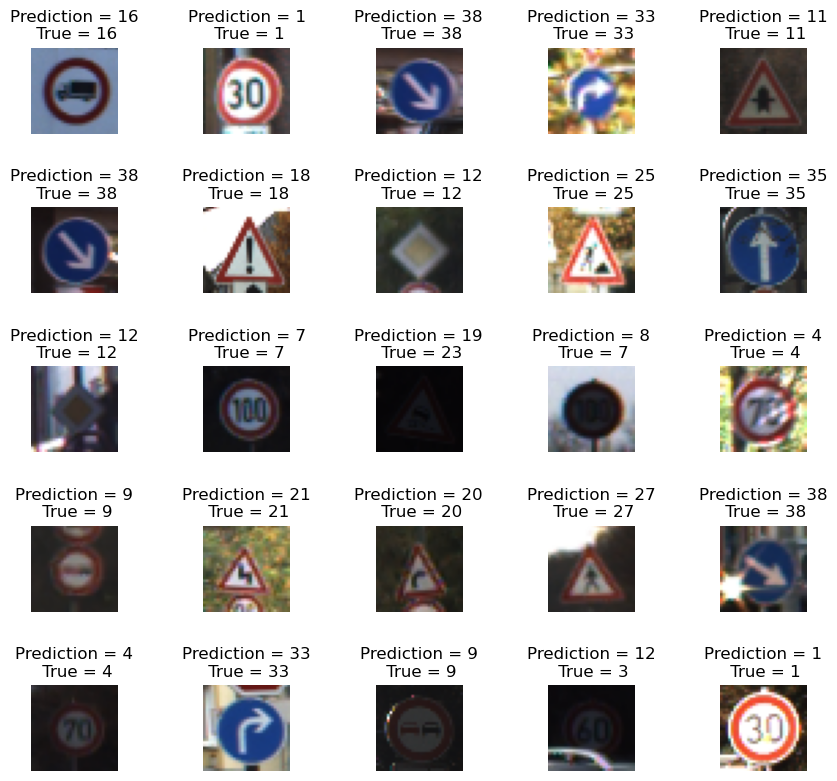

In [35]:
length = 5
width = 5

fig, axes = plt.subplots(length, Width, figsize = (10,10))

axes = axes.ravel() 


for i in np.arange(0,Width*length):
    
    # Select a random number
    index = np.random.randint(0,n_training)

    # read and display an image with the selected index  
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)
plt.show()